## 基于贝叶斯决策理论的分类方法
**朴素贝叶斯是贝叶斯决策理论的一部分**
- 优点：在数据较少的情况下仍然有效，可以处理多类别问题
- 缺点：对于输入数据的准备方式较为敏感
- 适用数据类型：标称型数据

  *标称型：一般在有限的数据中取，而且只存在‘是’和‘否’两种不同的结果（一般用于分类）*
  *数值型：可以在无限的数据中取，而且数值比较具体化，例如4.02,6.23这种值（一般用于回归分析）*

#### **贝叶斯决策理论的核心思想，即选择具有最高概率的决策**
- 假设现在我们有一个数据集，它由两类数据组成，数据分布如图
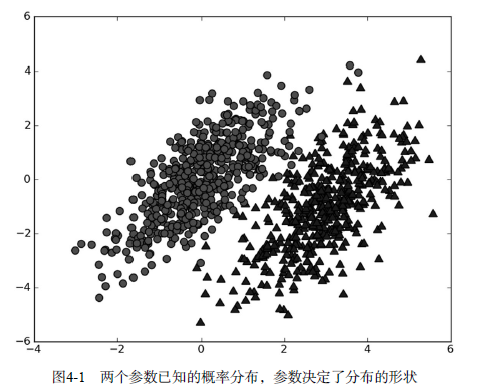
- 我们现在用p1(x,y)表示数据点(x,y)属于类别1（图中用圆点表示的类别）的概率，用p2(x,y)表示数据点(x,y)属于类别2（图中用三角形表示的类别）的概率，那么对于一个新数据点(x,y)，可以用下面的规则来判断它的类别：
 - 如果 p1(x,y) > p2(x,y)，那么类别为1
 - 如果 p2(x,y) > p1(x,y)，那么类别为2

- **计算分类的方法**
 - 使用kNN，进行1000次距离计算；
 - 使用决策树，分别沿x轴、y轴划分数据；
 - 计算数据点属于每个类别的概率，并进行比较